In [13]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import re
import itertools
import pickle
from pathlib import Path

In [14]:
def test_name(size: int, num_agents: int, density: float, count: int = 30):
    return f"{size}x{size}size_{num_agents}agents_{density}density_{count}.pth"

def test(size: int, num_agents: int, density: float, count: int = 30):
    path = Path("../tests/test_set/").absolute() / test_name(size, num_agents, density, count)
    with open(path, "rb") as f:
        return pickle.load(f)

def result(model: str, size: int, num_agents: int, density: float, count: int = 30):
    if model.lower() == "dcc":
        path = Path("../DCC_test/results").absolute() / test_name(size, num_agents, density, count)
    elif model.lower() == "dcc2":
        path = Path("../DCC_test/results_v2").absolute() / test_name(size, num_agents, density, count)
    elif model.lower() == "scrimp":
        path = Path("../scrimp_test/results").absolute() / test_name(size, num_agents, density, count)
    else:
        raise ValueError("Invalid model name")
    with open(path, "rb") as f:
        return pickle.load(f)

In [15]:
def tabular(model: str, sizes: list[int], nums_agents: list[int], densities: list[float], f):
    print(f"#table(columns: {len(nums_agents) + 1}, align: center,")
    print("table.cell(stroke: none)[],")
    print(f"table.cell(colspan: {len(nums_agents)}, stroke: none)[Количество агентов],")
    print()
    print("table.cell(stroke: none)[Размер карты],")
    for num_agents in nums_agents:
        print(f"[*{num_agents}*],")
    print()
    for size in sizes:
        print(f"[*{size}x{size}*],")
        for num_agents in nums_agents:
            print(f"[ #grid(columns: ({'1fr,' * len(densities)}))", end="")
            for density in densities:
                try:
                    res = result(model, size, num_agents, density)
                except FileNotFoundError:
                    print("[???]", end="")
                    continue
                val = f(res)
                del res
                print(f"[{val}]", end="")
            print(' ]', end=",\n")
        print()

    print("table.cell(stroke: none)[],")
    for _ in nums_agents:
        print(f"[ #grid(columns: ({'1fr,' * len(densities)}))", end="")
        for density in densities:
            print(f"[*{density}*]", end="")
        print(' ]', end=",\n")
    print()

    print("table.cell(stroke: none)[],")
    print(f"table.cell(colspan: {len(nums_agents)}, stroke: none)[Плотность препятствий],")
    print(")")

In [16]:
tabular("dcc", [32, 64, 96], [16, 32, 64, 96], [0.2, 0.3, 0.4], lambda x: f"{np.array(x[0]).mean() * 100:.0f}%")

#table(columns: 5, align: center,
table.cell(stroke: none)[],
table.cell(colspan: 4, stroke: none)[Количество агентов],

table.cell(stroke: none)[Размер карты],
[*16*],
[*32*],
[*64*],
[*96*],

[*32x32*],
[ #grid(columns: (1fr,1fr,1fr,))[100%][100%][93%] ],
[ #grid(columns: (1fr,1fr,1fr,))[100%][97%][87%] ],
[ #grid(columns: (1fr,1fr,1fr,))[93%][67%][17%] ],
[ #grid(columns: (1fr,1fr,1fr,))[57%][13%][0%] ],

[*64x64*],
[ #grid(columns: (1fr,1fr,1fr,))[97%][100%][97%] ],
[ #grid(columns: (1fr,1fr,1fr,))[97%][100%][87%] ],
[ #grid(columns: (1fr,1fr,1fr,))[100%][97%][80%] ],
[ #grid(columns: (1fr,1fr,1fr,))[93%][90%][40%] ],

[*96x96*],
[ #grid(columns: (1fr,1fr,1fr,))[97%][100%][100%] ],
[ #grid(columns: (1fr,1fr,1fr,))[97%][100%][100%] ],
[ #grid(columns: (1fr,1fr,1fr,))[80%][93%][100%] ],
[ #grid(columns: (1fr,1fr,1fr,))[83%][97%][80%] ],

table.cell(stroke: none)[],
[ #grid(columns: (1fr,1fr,1fr,))[*0.2*][*0.3*][*0.4*] ],
[ #grid(columns: (1fr,1fr,1fr,))[*0.2*][*0.3*][*0.4*] ],
[ #gri

In [17]:
tabular(
    "dcc2", [32, 64, 96], [16, 32, 64, 96], [0.2, 0.3, 0.4],
    lambda x: f"#text(fill: grad.sample({100 - np.array(x[0]).mean() * 100:.0f}%))[{np.array(x[0]).mean() * 100:.0f}%]"
)

#table(columns: 5, align: center,
table.cell(stroke: none)[],
table.cell(colspan: 4, stroke: none)[Количество агентов],

table.cell(stroke: none)[Размер карты],
[*16*],
[*32*],
[*64*],
[*96*],

[*32x32*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(fill: grad.sample(0%))[100%]][#text(fill: grad.sample(0%))[100%]][#text(fill: grad.sample(3%))[97%]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(fill: grad.sample(0%))[100%]][#text(fill: grad.sample(3%))[97%]][#text(fill: grad.sample(20%))[80%]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(fill: grad.sample(17%))[83%]][#text(fill: grad.sample(40%))[60%]][#text(fill: grad.sample(73%))[27%]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(fill: grad.sample(47%))[53%]][#text(fill: grad.sample(90%))[10%]][#text(fill: grad.sample(97%))[3%]] ],

[*64x64*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(fill: grad.sample(3%))[97%]][#text(fill: grad.sample(0%))[100%]][#text(fill: grad.sample(0%))[100%]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(fill: grad.sample(3%))[97%]]

In [18]:
tabular(
    "scrimp", [32, 64, 96], [16, 32, 64, 96], [0.2, 0.3, 0.4],
    lambda x: f"#text(fill: grad.sample({100 - np.array(x[0]).mean() * 100:.0f}%))[{np.array(x[0]).mean() * 100:.0f}%]"
)

#table(columns: 5, align: center,
table.cell(stroke: none)[],
table.cell(colspan: 4, stroke: none)[Количество агентов],

table.cell(stroke: none)[Размер карты],
[*16*],
[*32*],
[*64*],
[*96*],

[*32x32*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(fill: grad.sample(0%))[100%]][#text(fill: grad.sample(0%))[100%]][#text(fill: grad.sample(0%))[100%]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(fill: grad.sample(0%))[100%]][#text(fill: grad.sample(7%))[93%]][#text(fill: grad.sample(13%))[87%]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(fill: grad.sample(7%))[93%]][#text(fill: grad.sample(27%))[73%]][#text(fill: grad.sample(60%))[40%]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(fill: grad.sample(40%))[60%]][#text(fill: grad.sample(73%))[27%]][#text(fill: grad.sample(97%))[3%]] ],

[*64x64*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(fill: grad.sample(0%))[100%]][#text(fill: grad.sample(0%))[100%]][#text(fill: grad.sample(0%))[100%]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(fill: grad.sample(0%))[100%

In [19]:
def f(results):
    success = np.array(results[0], dtype=np.bool_)
    steps = np.array(results[1], dtype=np.int_)
    if success.sum() == 0:
        return "???"
    successful = steps[success].mean()
    return f"#text(size: 0.8em)[{successful:.1f}]"
tabular("dcc", [32, 64, 96], [16, 32, 64, 96], [0.2, 0.3, 0.4], f)

#table(columns: 5, align: center,
table.cell(stroke: none)[],
table.cell(colspan: 4, stroke: none)[Количество агентов],

table.cell(stroke: none)[Размер карты],
[*16*],
[*32*],
[*64*],
[*96*],

[*32x32*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[45.6]][#text(size: 0.8em)[61.8]][#text(size: 0.8em)[57.4]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[64.8]][#text(size: 0.8em)[79.4]][#text(size: 0.8em)[114.7]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[111.1]][#text(size: 0.8em)[166.1]][#text(size: 0.8em)[208.0]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[182.8]][#text(size: 0.8em)[278.0]][???] ],

[*64x64*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[91.3]][#text(size: 0.8em)[96.2]][#text(size: 0.8em)[113.9]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[98.1]][#text(size: 0.8em)[116.4]][#text(size: 0.8em)[141.5]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[111.3]][#text(size: 0.8em)[131.6]][#text(size: 0.8em)[206.4

In [20]:
def f(results):
    success = np.array(results[0], dtype=np.bool_)
    steps = np.array(results[1], dtype=np.int_)
    if success.sum() == 0:
        return "???"
    successful = steps[success].mean()
    return f"#text(size: 0.8em)[{successful:.1f}]"
tabular("scrimp", [32, 64], [16, 32, 64, 96], [0.2, 0.3, 0.4], f)

#table(columns: 5, align: center,
table.cell(stroke: none)[],
table.cell(colspan: 4, stroke: none)[Количество агентов],

table.cell(stroke: none)[Размер карты],
[*16*],
[*32*],
[*64*],
[*96*],

[*32x32*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[44.0]][#text(size: 0.8em)[62.0]][#text(size: 0.8em)[64.0]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[62.6]][#text(size: 0.8em)[92.0]][#text(size: 0.8em)[112.2]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[82.6]][#text(size: 0.8em)[169.7]][#text(size: 0.8em)[186.4]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[176.8]][#text(size: 0.8em)[222.2]][#text(size: 0.8em)[297.0]] ],

[*64x64*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[89.7]][#text(size: 0.8em)[100.7]][#text(size: 0.8em)[114.5]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[100.7]][#text(size: 0.8em)[123.3]][#text(size: 0.8em)[147.8]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[124.9]][#text(size: 0.8em)[153.5]][#

In [21]:
def f(results):
    success = np.array(results[0], dtype=np.bool_)
    total = 0
    for i, positions in enumerate(results[3]):
        map_total = 0
        if not success[i]:
            continue
        for agent in range(len(positions[0])):
            # last index where agent is not in the goal
            for t in range(len(positions) - 1, -1, -1):
                if np.any(positions[t][agent] != positions[-1][agent]):
                    break
            map_total += t
        total += map_total / len(positions[0])
    if success.sum() == 0:
        return "???"
    flowtime = total / success.sum()
    return f"#text(size: 0.8em)[{flowtime:.01f}]"
tabular("dcc", [32, 64, 96], [16, 32, 64, 96], [0.2, 0.3, 0.4], f)

#table(columns: 5, align: center,
table.cell(stroke: none)[],
table.cell(colspan: 4, stroke: none)[Количество агентов],

table.cell(stroke: none)[Размер карты],
[*16*],
[*32*],
[*64*],
[*96*],

[*32x32*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[21.3]][#text(size: 0.8em)[30.6]][#text(size: 0.8em)[23.0]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[26.4]][#text(size: 0.8em)[35.2]][#text(size: 0.8em)[36.6]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[34.7]][#text(size: 0.8em)[65.5]][#text(size: 0.8em)[73.3]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[48.3]][#text(size: 0.8em)[81.2]][???] ],

[*64x64*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[44.5]][#text(size: 0.8em)[52.3]][#text(size: 0.8em)[42.0]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[44.9]][#text(size: 0.8em)[53.9]][#text(size: 0.8em)[50.2]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[47.5]][#text(size: 0.8em)[60.4]][#text(size: 0.8em)[67.7]] ],
[ #gri

In [22]:
def f(results):
    success = np.array(results[0], dtype=np.bool_)
    total = 0
    for i, positions in enumerate(results[3]):
        map_total = 0
        if not success[i]:
            continue
        for agent in range(len(positions[0])):
            # last index where agent is not in the goal
            for t in range(len(positions) - 1, -1, -1):
                if np.any(positions[t][agent] != positions[-1][agent]):
                    break
            map_total += t
        total += map_total / len(positions[0])
    if success.sum() == 0:
        return "???"
    flowtime = total / success.sum()
    return f"#text(size: 0.8em)[{flowtime:.01f}]"
tabular("scrimp", [32, 64], [16, 32, 64, 96], [0.2, 0.3, 0.4], f)

#table(columns: 5, align: center,
table.cell(stroke: none)[],
table.cell(colspan: 4, stroke: none)[Количество агентов],

table.cell(stroke: none)[Размер карты],
[*16*],
[*32*],
[*64*],
[*96*],

[*32x32*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[23.5]][#text(size: 0.8em)[34.1]][#text(size: 0.8em)[28.1]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[30.4]][#text(size: 0.8em)[42.8]][#text(size: 0.8em)[43.0]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[37.1]][#text(size: 0.8em)[67.5]][#text(size: 0.8em)[73.2]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[64.2]][#text(size: 0.8em)[87.6]][#text(size: 0.8em)[117.1]] ],

[*64x64*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[50.4]][#text(size: 0.8em)[60.3]][#text(size: 0.8em)[56.3]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[51.1]][#text(size: 0.8em)[63.2]][#text(size: 0.8em)[66.2]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[55.0]][#text(size: 0.8em)[70.9]][#text(size: 0

In [23]:
def f(results):
    success = np.array(results[0], dtype=np.bool_)
    total = 0
    for i, positions in enumerate(results[3]):
        map_total = 0
        if not success[i]:
            continue
        for agent in range(len(positions[0])):
            for t in range(len(positions)):
                if np.all(positions[t][agent] == positions[-1][agent]):
                    break
            map_total += t - 1
        total += map_total / len(positions[0])
    if success.sum() == 0:
        return "???"
    flowtime = total / success.sum()
    return f"#text(size: 0.8em)[{flowtime:.01f}]"
tabular("dcc", [32, 64, 96], [16, 32, 64, 96], [0.2, 0.3, 0.4], f)

#table(columns: 5, align: center,
table.cell(stroke: none)[],
table.cell(colspan: 4, stroke: none)[Количество агентов],

table.cell(stroke: none)[Размер карты],
[*16*],
[*32*],
[*64*],
[*96*],

[*32x32*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[20.9]][#text(size: 0.8em)[28.7]][#text(size: 0.8em)[20.2]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[24.5]][#text(size: 0.8em)[30.3]][#text(size: 0.8em)[28.7]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[29.0]][#text(size: 0.8em)[52.5]][#text(size: 0.8em)[51.0]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[36.7]][#text(size: 0.8em)[56.8]][???] ],

[*64x64*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[43.8]][#text(size: 0.8em)[51.4]][#text(size: 0.8em)[40.1]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[43.8]][#text(size: 0.8em)[51.9]][#text(size: 0.8em)[45.4]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[45.5]][#text(size: 0.8em)[55.9]][#text(size: 0.8em)[59.3]] ],
[ #gri

In [24]:
def f(results):
    success = np.array(results[0], dtype=np.bool_)
    total = 0
    for i, positions in enumerate(results[3]):
        map_total = 0
        if not success[i]:
            continue
        for agent in range(len(positions[0])):
            for t in range(len(positions)):
                if np.all(positions[t][agent] == positions[-1][agent]):
                    break
            map_total += t - 1
        total += map_total / len(positions[0])
    if success.sum() == 0:
        return "???"
    flowtime = total / success.sum()
    return f"#text(size: 0.8em)[{flowtime:.01f}]"
tabular("scrimp", [32, 64], [16, 32, 64, 96], [0.2, 0.3, 0.4], f)

#table(columns: 5, align: center,
table.cell(stroke: none)[],
table.cell(colspan: 4, stroke: none)[Количество агентов],

table.cell(stroke: none)[Размер карты],
[*16*],
[*32*],
[*64*],
[*96*],

[*32x32*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[20.5]][#text(size: 0.8em)[27.6]][#text(size: 0.8em)[18.4]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[23.2]][#text(size: 0.8em)[26.6]][#text(size: 0.8em)[23.0]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[25.6]][#text(size: 0.8em)[35.7]][#text(size: 0.8em)[27.2]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[27.4]][#text(size: 0.8em)[35.0]][#text(size: 0.8em)[27.0]] ],

[*64x64*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[43.4]][#text(size: 0.8em)[51.5]][#text(size: 0.8em)[39.2]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[43.5]][#text(size: 0.8em)[51.0]][#text(size: 0.8em)[45.9]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[45.3]][#text(size: 0.8em)[53.5]][#text(size: 0.

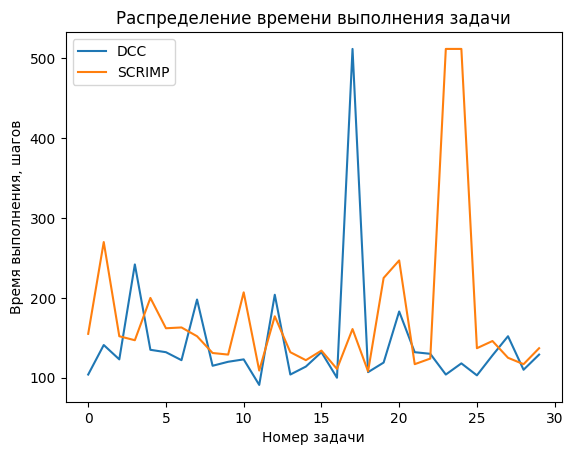

In [25]:
plt.title("Распределение времени выполнения задачи")
plt.xlabel("Номер задачи")
plt.ylabel("Время выполнения, шагов")
plt.xticks(None)
res = result("dcc", 64, 64, 0.3)
success = np.array(res[0], dtype=np.bool_)
steps = np.array(res[1])
steps[~success] = 512
plt.plot(steps, label="DCC")
del res

res = result("scrimp", 64, 64, 0.3)
success = np.array(res[0], dtype=np.bool_)
steps = np.array(res[1])
steps[~success] = 512
plt.plot(steps, label="SCRIMP")
del res

plt.legend()

In [26]:
def f(results):
    success = np.array(results[0], dtype=np.bool_)
    if success.sum() == 0:
        return "???"
    return f"#text(size: 0.8em)[{np.array(results[2])[success].mean():.01f}]"
tabular("dcc", [32, 64, 96], [16, 32, 64, 96], [0.2, 0.3, 0.4], f)

#table(columns: 5, align: center,
table.cell(stroke: none)[],
table.cell(colspan: 4, stroke: none)[Количество агентов],

table.cell(stroke: none)[Размер карты],
[*16*],
[*32*],
[*64*],
[*96*],

[*32x32*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[37.8]][#text(size: 0.8em)[78.0]][#text(size: 0.8em)[90.1]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[197.1]][#text(size: 0.8em)[393.9]][#text(size: 0.8em)[505.3]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[1133.9]][#text(size: 0.8em)[3239.4]][#text(size: 0.8em)[3441.0]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[3454.4]][#text(size: 0.8em)[6859.2]][???] ],

[*64x64*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[20.2]][#text(size: 0.8em)[30.2]][#text(size: 0.8em)[43.0]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[82.9]][#text(size: 0.8em)[146.2]][#text(size: 0.8em)[221.9]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[347.4]][#text(size: 0.8em)[731.9]][#text(size: 0.8em)

In [27]:
def f(results):
    success = np.array(results[0], dtype=np.bool_)
    val =  (np.array(results[2]) / np.array(results[1]) / np.array(len(results[3][0]))).mean()
    return f"#text(size: 0.8em)[#text(fill: grad.sample({val * 1000 :.0f}%))[{val:.04f}]]"
tabular("dcc", [32, 64, 96], [16, 32, 64, 96], [0.2, 0.3, 0.4], f)

#table(columns: 5, align: center,
table.cell(stroke: none)[],
table.cell(colspan: 4, stroke: none)[Количество агентов],

table.cell(stroke: none)[Размер карты],
[*16*],
[*32*],
[*64*],
[*96*],

[*32x32*],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[#text(fill: grad.sample(18%))[0.0184]]][#text(size: 0.8em)[#text(fill: grad.sample(19%))[0.0185]]][#text(size: 0.8em)[#text(fill: grad.sample(19%))[0.0193]]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[#text(fill: grad.sample(38%))[0.0385]]][#text(size: 0.8em)[#text(fill: grad.sample(66%))[0.0659]]][#text(size: 0.8em)[#text(fill: grad.sample(48%))[0.0482]]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[#text(fill: grad.sample(94%))[0.0941]]][#text(size: 0.8em)[#text(fill: grad.sample(200%))[0.1995]]][#text(size: 0.8em)[#text(fill: grad.sample(40%))[0.0403]]] ],
[ #grid(columns: (1fr,1fr,1fr,))[#text(size: 0.8em)[#text(fill: grad.sample(112%))[0.1117]]][#text(size: 0.8em)[#text(fill: grad.sample(67%))[0.0670]]][#te